# BostonHouse Analysis and Price Prediction
Data analysis is done on boston house prices dataset.
A Linear Regression and SVM Model is created based on the analysis. 
Accuracy of both the models are also checked and compared.

## Gathering dataset and importing necessary modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston

In [4]:
df=load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## Cleaning of data

In [5]:
df_X=pd.DataFrame(df.data,columns=df.feature_names)
df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
df_y=pd.DataFrame(df.target)
df_y.columns=['TARGET_PRICE']
df_y.head()

,TARGET_PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## Dividing whole dataset into train and test examples 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(df_X,df_y,train_size=0.7,random_state=45)

## Perform Linear Regression on whole dataset

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [12]:
y_predicted=reg.predict(X_test)
y_predicted

array([[10.00376482],
       [23.43523897],
       [24.97427528],
       [21.49513418],
       [35.087565  ],
       [14.4073179 ],
       [19.53619664],
       [19.05985671],
       [27.75456432],
       [17.46204576],
       [14.58406759],
       [20.1053761 ],
       [36.24481005],
       [23.76497262],
       [16.33666771],
       [20.04301995],
       [28.23656578],
       [11.3120847 ],
       [15.83752045],
       [22.40804802],
       [22.43870432],
       [14.02359736],
       [19.9263803 ],
       [32.30256753],
       [22.55245086],
       [27.59507183],
       [23.04764447],
       [ 7.5166162 ],
       [26.13123837],
       [19.31598931],
       [21.3574126 ],
       [ 8.47827666],
       [28.07099631],
       [24.93339977],
       [35.83055122],
       [25.51079562],
       [39.48633873],
       [ 2.31693321],
       [31.49374242],
       [32.59170008],
       [19.53631358],
       [21.99811248],
       [17.22889357],
       [31.08987315],
       [18.82675489],
       [18

In [13]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_predicted)
accuracy

0.7467438556481067

## Merging data with target

In [14]:
boston=pd.concat([df_X,df_y],axis=1)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Exploratory Data Analysis

In [15]:
import seaborn as sns

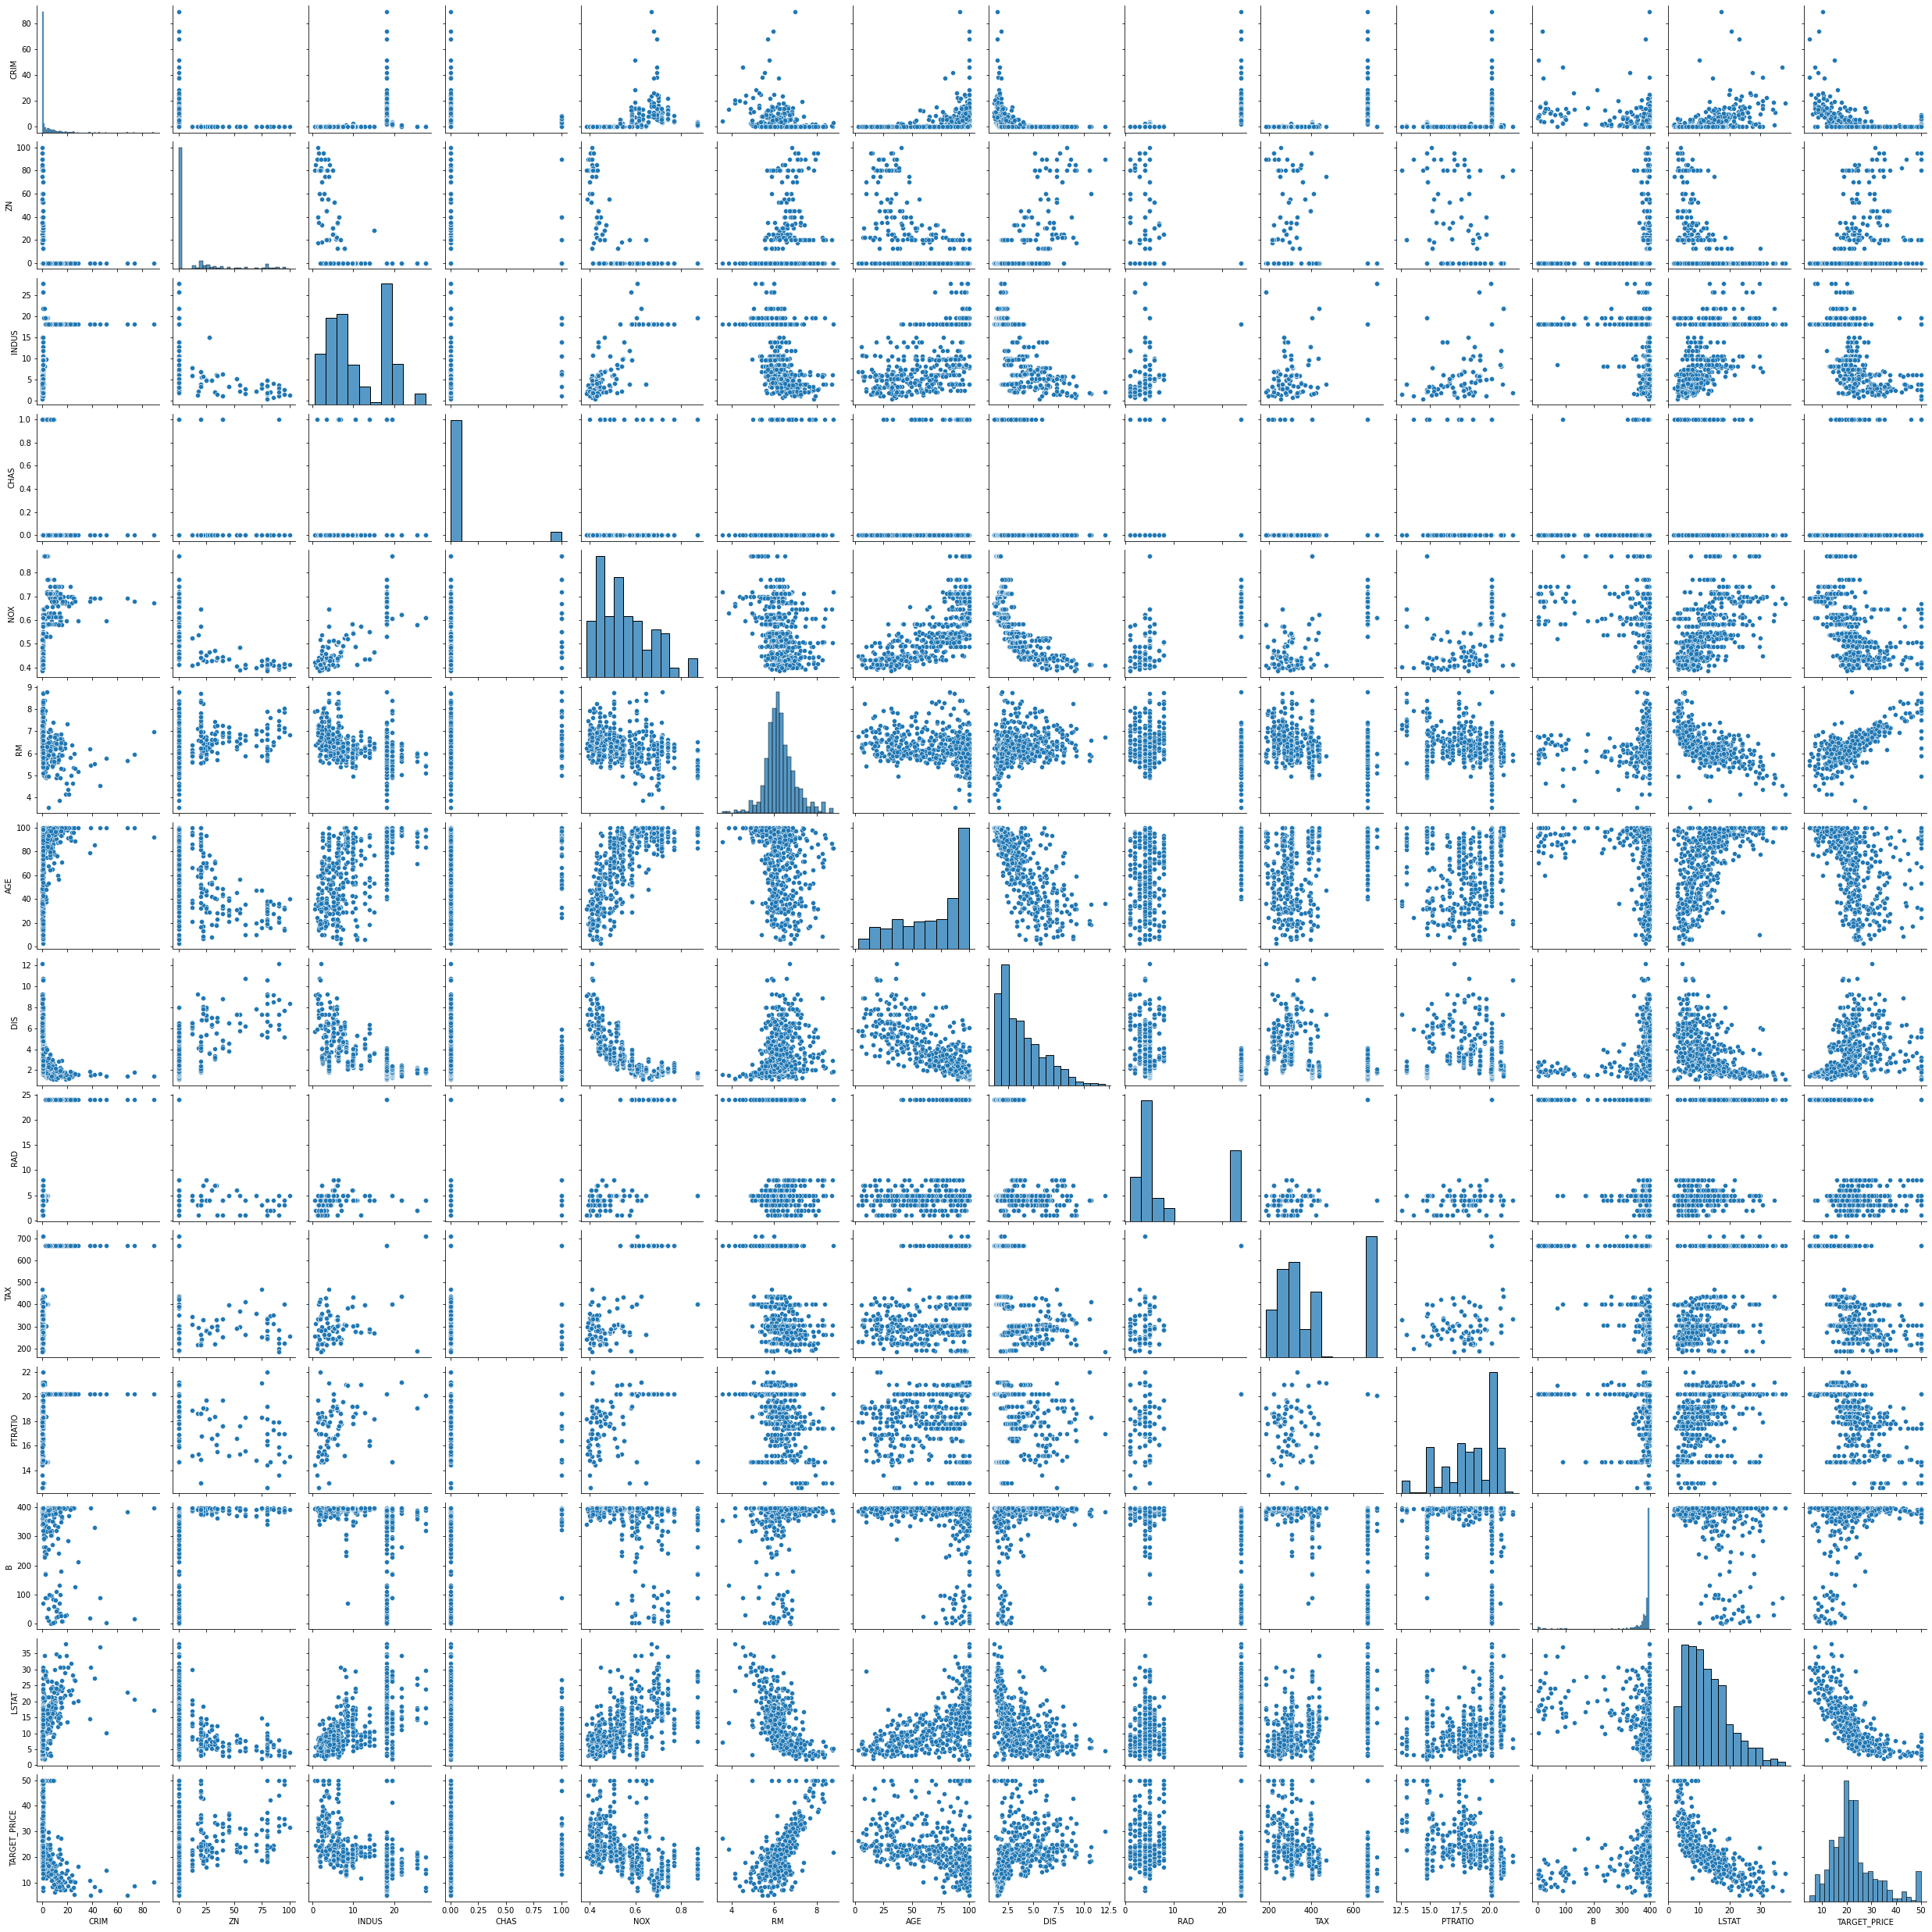

In [16]:
sns.pairplot(boston)
plt.show()

<AxesSubplot:>

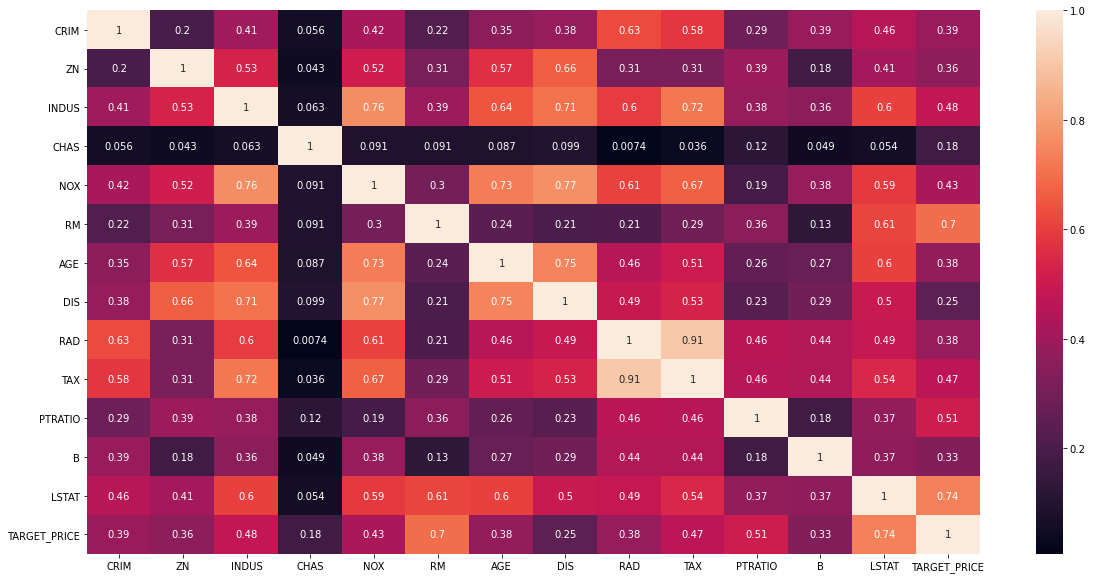

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston.corr().abs(), annot=True)

In [18]:
#since we know that target_price is more correlated to LSTAT

In [19]:
boston_X=boston['LSTAT']
boston_X

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

In [20]:
boston_y=boston['TARGET_PRICE']
boston_y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: TARGET_PRICE, Length: 506, dtype: float64

## Splitting into train and test examples (LSTAT vs TARGET_PRICE)

In [21]:
X1_train,X1_test,y1_train,y1_test = train_test_split(boston_X,boston_y,train_size=0.7,random_state=40)

In [22]:
X1_train=X1_train[:,np.newaxis]

In [23]:
X1_test=X1_test[:,np.newaxis]

## Linear Regression and Support Vector Regression with Data Visualisation

In [24]:
Reg1=LinearRegression()
Reg1.fit(X1_train,y1_train)

LinearRegression()

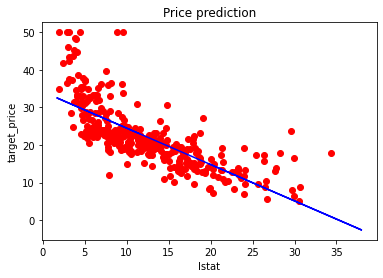

In [25]:
plt.scatter(X1_train,y1_train,color='red')
plt.plot(X1_test,Reg1.predict(X1_test),color='blue')
plt.title('Price prediction')
plt.xlabel('lstat')
plt.ylabel('target_price')
plt.show()

In [26]:
y1_predicted=Reg1.predict(X1_test)

In [27]:
accuracy1=r2_score(y1_test,y1_predicted)
accuracy1

0.5189381794053394

### The accuracy of Linear Regressor is 51%

In [32]:
from sklearn.svm import SVR


In [33]:
model_svm = SVR()
model_svm.fit(X1_train,y1_train)

SVR()

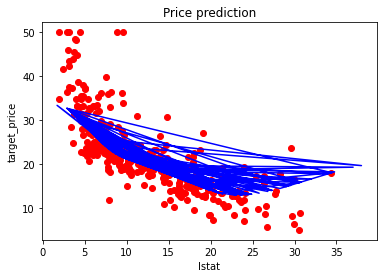

In [34]:
plt.scatter(X1_train,y1_train,color='red')
plt.plot(X1_test,model_svm.predict(X1_test),color='blue')
plt.title('Price prediction')
plt.xlabel('lstat')
plt.ylabel('target_price')
plt.show()

In [35]:
y1_predicted=model_svm.predict(X1_test)

In [36]:
accuracy2=r2_score(y1_test,y1_predicted)
accuracy2

0.5574876149136923

### The accuracy of Support Vector Regressor is 55%

## Conclusion : 

The support vector machine is giving us better results than linear regressor for the Boston Price Prediction dataset.